### Problem Statement 1:
##### Predict whether income exceeds $50K/yr based on census data. Also known as the "Census Income" dataset

Importing Libraries

In [59]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import sklearn

Importing Datasets

In [60]:
my_dataset1 = pd.read_csv("adult.csv")
my_dataset1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Basic Insights

In [61]:
print(my_dataset1.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object


In [62]:
print(my_dataset1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [63]:
my_dataset1.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [64]:
my_dataset1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

## Understanding the Variables

In [65]:
int_list = list(my_dataset1.select_dtypes(['int']).columns)

In [66]:
print("Independent variable with integer d-type")
for i in int_list:
    print(i)

Independent variable with integer d-type
age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week


1.Age

<AxesSubplot:xlabel='age', ylabel='Density'>

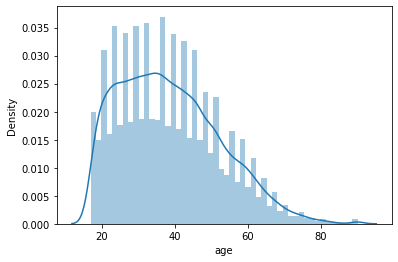

In [67]:
sns.distplot(my_dataset1["age"])

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

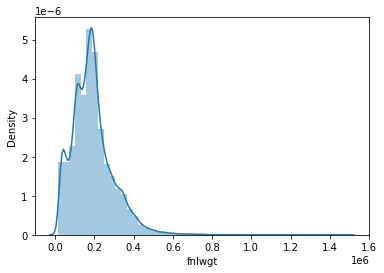

In [68]:
sns.distplot(my_dataset1["fnlwgt"])

<AxesSubplot:xlabel='education-num', ylabel='Density'>

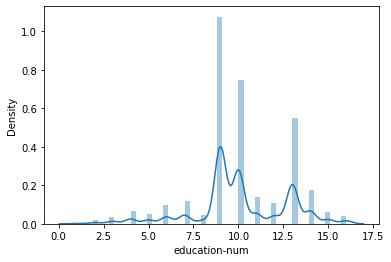

In [69]:
sns.distplot(my_dataset1["education-num"])

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

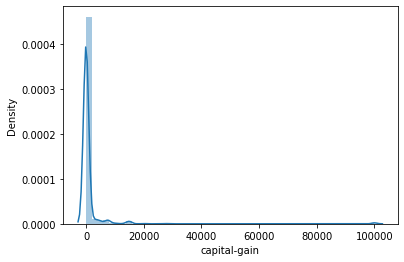

In [70]:
sns.distplot(my_dataset1["capital-gain"])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

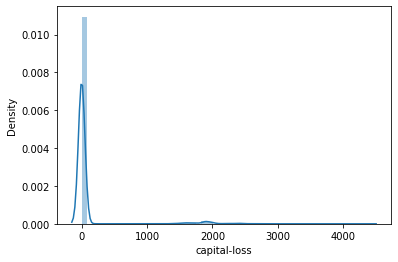

In [71]:
sns.distplot(my_dataset1["capital-loss"])

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

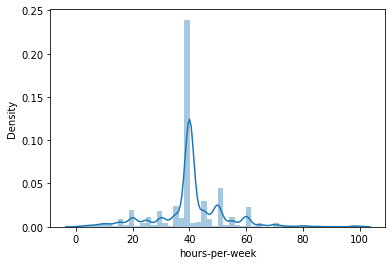

In [72]:
sns.distplot(my_dataset1["hours-per-week"])

Box Plot to understand Outliers


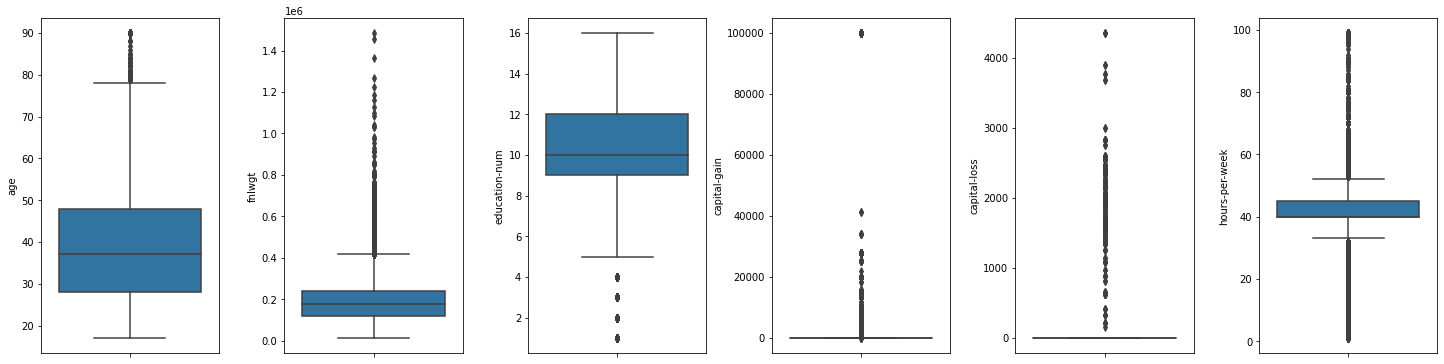

In [73]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(20,5))
index = 0
ax = ax.flatten()

for col in int_list:
    sns.boxplot(y=col, data=my_dataset1, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Coorelation Matrix

<AxesSubplot:>

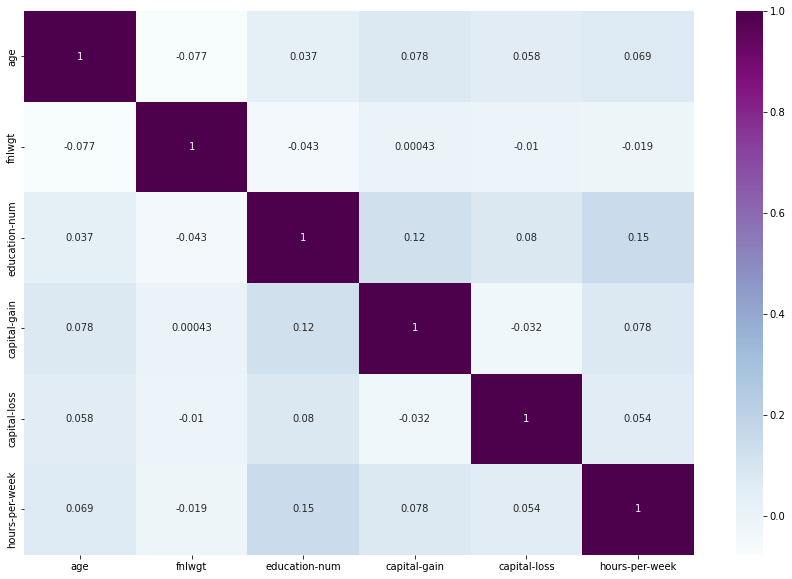

In [74]:
corr = my_dataset1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

Exploring the Object Datatypes

In [75]:
obj_list = list(my_dataset1.select_dtypes(['object']).columns)

In [76]:
print("Independent variable with Object d-type")
for i in obj_list:
    print(i)

Independent variable with Object d-type
workclass
education
marital-status
occupation
relationship
race
sex
country
salary


In [77]:
for i in obj_list:
    print(i)
    print(my_dataset1[i].value_counts())
    print("")

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

occupation
 Prof-specialty      

There are " ?" in 3 columns : Workclass, occupation and Country

In [78]:
# Replacing the " ?" with np.NaN
my_dataset1.replace(" ?", np.nan, inplace = True)

In [79]:
my_dataset1.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

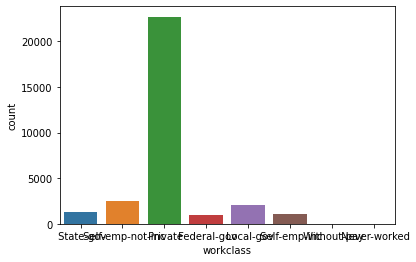

In [80]:
sns.countplot(my_dataset1['workclass'])

<AxesSubplot:xlabel='education', ylabel='count'>

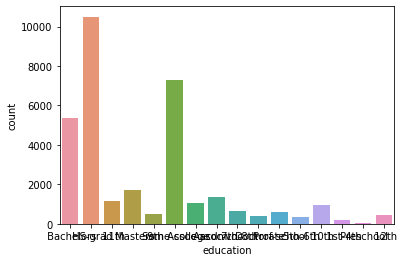

In [81]:
sns.countplot(my_dataset1['education'])

<AxesSubplot:xlabel='marital-status', ylabel='count'>

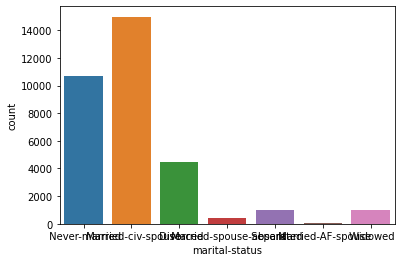

In [82]:
sns.countplot(my_dataset1['marital-status'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

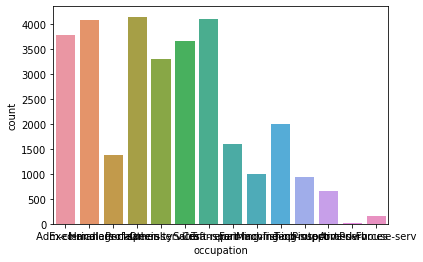

In [83]:
sns.countplot(my_dataset1['occupation'])

<AxesSubplot:xlabel='relationship', ylabel='count'>

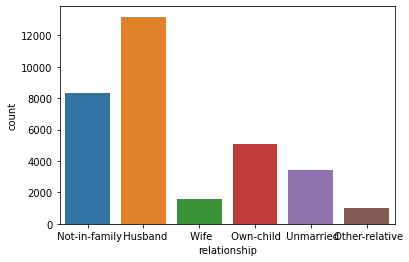

In [84]:
sns.countplot(my_dataset1['relationship'])

<AxesSubplot:xlabel='race', ylabel='count'>

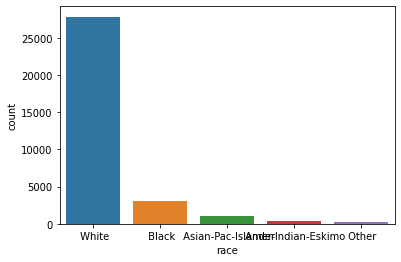

In [85]:
sns.countplot(my_dataset1['race'])

<AxesSubplot:xlabel='sex', ylabel='count'>

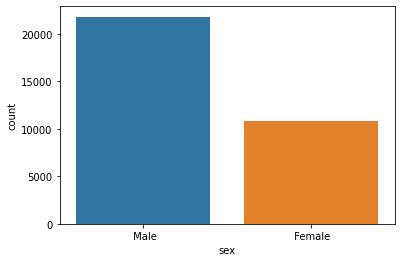

In [86]:
sns.countplot(my_dataset1['sex'])

<AxesSubplot:xlabel='country', ylabel='count'>

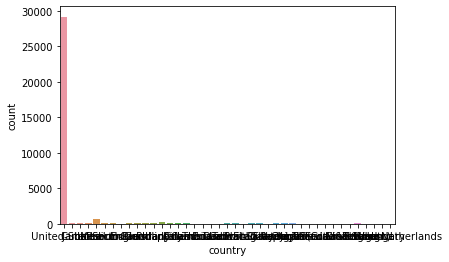

In [87]:
sns.countplot(my_dataset1['country'])

<AxesSubplot:xlabel='salary', ylabel='count'>

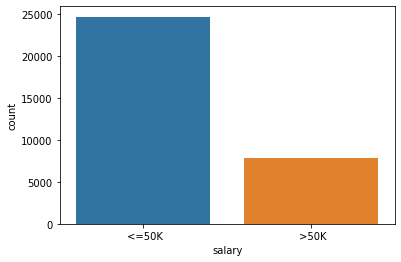

In [88]:
sns.countplot(my_dataset1['salary'])

## Feature Engineering

NameError: name 'my_dataset1_clean' is not defined

In [90]:
my_dataset1.replace(" ?", np.nan, inplace = True)

In [91]:
my_dataset1_clean = my_dataset1.fillna("Unknown")
my_dataset1_clean

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [92]:
my_dataset1.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [93]:
for i in obj_list:
    print(i)
    print(my_dataset1_clean[i].value_counts())
    print("")

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Unknown               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

occupation
 Prof-specialty      

In [94]:
my_dataset1_clean.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [97]:
my_dataset1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [96]:
my_dataset1_clean

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [99]:
column_names_for_onehot = obj_list
final_dataset = pd.get_dummies(my_dataset1_clean, columns=column_names_for_onehot, drop_first=True)

In [100]:
final_dataset

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,country_Unknown,salary_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32557,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32559,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Train-Test Split

In [101]:
X = final_dataset.drop(columns=['salary_ >50K'], axis=1)
y = final_dataset['salary_ >50K']

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [103]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 80.21127625598821
Cross validation is 79.75799440619801


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier


In [105]:
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 85.68971870777546
Cross validation is 85.39664198346833


In [106]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[5780,  434],
       [ 731, 1196]], dtype=int64)

<AxesSubplot:>

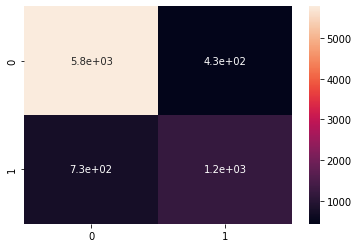

In [107]:
sns.heatmap(cm, annot=True)

The Model Accuracy is 85%